In [306]:
import numpy as np
import seaborn as sns

# Libraries
import pandas as pd               # Read from .csv
import matplotlib.pyplot as plt   # Display results

# Modules
from sklearn.cluster import KMeans

In [307]:
# Read in the dataset
dataset = pd.read_csv('/Users/joshuamarquez/anaconda_projects/2025_Summer_Research/Data Files/digital_behavior.csv')
dataset

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7
...,...,...,...,...,...,...,...,...,...
495,392.3,58,6.0,114,99.0,6.1,8.3,10.0,42.4
496,297.8,56,6.8,47,148.8,7.5,9.1,10.0,50.4
497,348.6,42,6.1,97,111.4,7.8,10.0,10.0,49.5
498,307.5,33,7.2,67,134.6,8.0,9.3,4.0,71.6


In [308]:
# Drop any rows with NA (non-existent values)
df.dropna(inplace = True)
df

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7
...,...,...,...,...,...,...,...,...,...
495,392.3,58,6.0,114,99.0,6.1,8.3,10.0,42.4
496,297.8,56,6.8,47,148.8,7.5,9.1,10.0,50.4
497,348.6,42,6.1,97,111.4,7.8,10.0,10.0,49.5
498,307.5,33,7.2,67,134.6,8.0,9.3,4.0,71.6


In [309]:
# Check if any duplicates in the dataset
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [310]:
# Drop any existing duplicates
dataset.drop_duplicates()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7
...,...,...,...,...,...,...,...,...,...
495,392.3,58,6.0,114,99.0,6.1,8.3,10.0,42.4
496,297.8,56,6.8,47,148.8,7.5,9.1,10.0,50.4
497,348.6,42,6.1,97,111.4,7.8,10.0,10.0,49.5
498,307.5,33,7.2,67,134.6,8.0,9.3,4.0,71.6


In [311]:
# Dataset has been cleaned, move on to clustering
# Slice the data into our two columns
# index 0 -> daily_screen_time_min
# index 1 -> sleep_hours

x = dataset[['social_media_time_min', 'sleep_hours']].values
x

array([[133.2,   5.9],
       [109.5,   7.2],
       [ 84.7,   8. ],
       [ 88.9,   6.5],
       [ 78.8,   6.9],
       [ 82.6,   8.5],
       [117. ,   6.8],
       [ 87.8,   9.6],
       [150.7,   7.2],
       [186.9,   4.4],
       [ 93.9,   7.4],
       [130.8,   7. ],
       [142.5,   8. ],
       [141.2,   7.3],
       [123.4,   6.3],
       [153.4,   5. ],
       [141.7,   6.2],
       [ 64.3,   5.5],
       [159.1,   5.8],
       [159.9,   7.2],
       [ 85.7,   8.5],
       [121.7,   7. ],
       [150.7,   5.1],
       [110.6,   7. ],
       [168.3,   7.9],
       [226.4,   5.8],
       [ 84.6,   6.3],
       [ 57.9,   6.5],
       [133.7,   5.6],
       [152.5,   7.3],
       [109.6,   6.4],
       [185.4,   7. ],
       [ 59.8,   5.4],
       [151.2,   6. ],
       [ 92.7,   7.4],
       [197.4,   6.1],
       [209.7,   8.6],
       [ 85.5,   6. ],
       [ 95.3,   6.8],
       [158.7,   7.6],
       [102.6,   4.8],
       [118. ,   4.4],
       [121.1,   4.7],
       [ 33

In [312]:
# Elbow method to find ideal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [313]:
# Output wcss
wcss

[958423.4349999999,
 340699.0964849773,
 191342.68809459254,
 108707.45498727603,
 86970.58270711973,
 58812.39384777314,
 41038.03694086573,
 30390.073150181313,
 25309.94694585589,
 19761.52699887258]

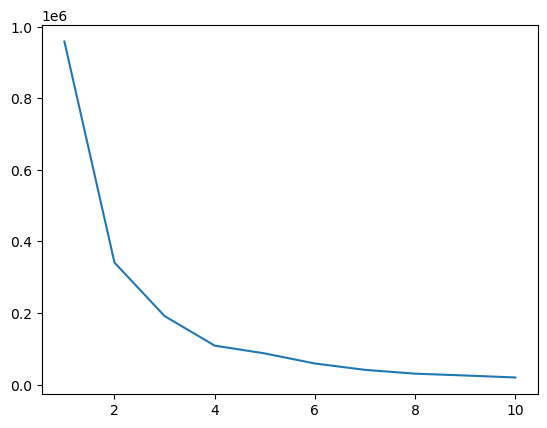

In [314]:
# Check Elbow Method graph
plt.plot(range(1, 11), wcss)

In [315]:
# 3 is the ideal number of clusters

In [316]:
# Output cluster assigned for every datum
# kmeans = KMeans(n_clusters = 3, init = 'k-means++')
# y_means = kmeans.fit_predict(x)
# y_means

# Testing Silhouette scores for 3 clusters vs 4 clusters
# The lower the score, the better the fit
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++')
labels_for_3_clusters = kmeans.fit_predict(x)

kmeans_4 = KMeans(n_clusters = 4, init = 'k-means++')
labels_for_4_clusters = kmeans.fit_predict(x)

from sklearn.metrics import silhouette_score

score_3 = silhouette_score(x, labels_for_3_clusters)
score_4 = silhouette_score(x, labels_for_4_clusters)

print(f'Silhouette score for 3 clusters: {score_3:.3f}')
print(f'Silhouette score for 4 clusters: {score_4:.3f}')

Silhouette score for 3 clusters: 0.524
Silhouette score for 4 clusters: 0.515


In [317]:
# Concatenate cluster numbers to our original dataset
y_means = kmeans_3.fit_predict(x)
dataset = dataset.drop(columns=[col for col in dataset.columns if col == 'cluster'])
dataset = pd.concat([dataset, pd.DataFrame(y_means, columns=['cluster'])], axis = 1)
dataset

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score,cluster
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8,0
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6,0
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6,1
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4,1
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7,1
...,...,...,...,...,...,...,...,...,...,...
495,392.3,58,6.0,114,99.0,6.1,8.3,10.0,42.4,1
496,297.8,56,6.8,47,148.8,7.5,9.1,10.0,50.4,0
497,348.6,42,6.1,97,111.4,7.8,10.0,10.0,49.5,0
498,307.5,33,7.2,67,134.6,8.0,9.3,4.0,71.6,0


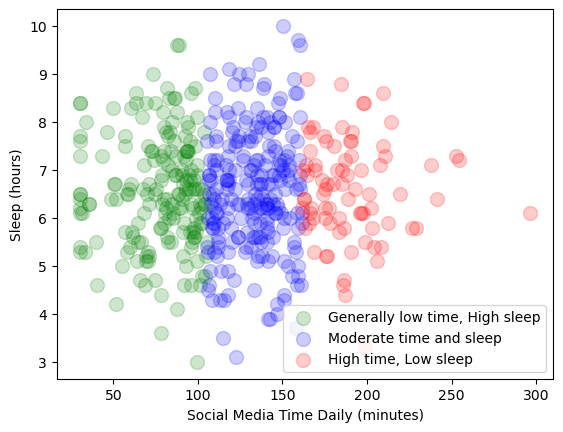

In [325]:
# # Set the cluster information for 4 clusters
# plt.scatter(x[dataset['cluster'] == 0, 0], x[dataset['cluster'] == 0, 1], s = 100, c = 'green', alpha = 0.2, 
#             label = '1')
# plt.scatter(x[dataset['cluster'] == 1, 0], x[dataset['cluster'] == 1, 1], s = 100, c = 'blue', alpha = 0.2, 
#             label = '2')
# plt.scatter(x[dataset['cluster'] == 2, 0], x[dataset['cluster'] == 2, 1], s = 100, c = 'orange', alpha = 0.2, 
#             label = '3')
# plt.scatter(x[dataset['cluster'] == 3, 0], x[dataset['cluster'] == 3, 1], s = 100, c = 'red', alpha = 0.2, 
#             label = '4')
# 
# # Plot the graph
# plt.xlabel('Social Media Time Daily (minutes)')
# plt.ylabel('Sleep (hours)')
# plt.legend()
# plt.show()

# Create a scatterplot

# Set the cluster information for 3 clusters
plt.scatter(x[dataset['cluster'] == 1, 0], x[dataset['cluster'] == 1, 1], s = 100, c = 'green', alpha = 0.2, 
            label = 'Generally low time, High sleep')
plt.scatter(x[dataset['cluster'] == 0, 0], x[dataset['cluster'] == 0, 1], s = 100, c = 'blue', alpha = 0.2, 
            label = 'Moderate time and sleep')
plt.scatter(x[dataset['cluster'] == 2, 0], x[dataset['cluster'] == 2, 1], s = 100, c = 'red', alpha = 0.2, 
            label = 'High time, Low sleep')

# Plot the graph
plt.xlabel('Social Media Time Daily (minutes)')
plt.ylabel('Sleep (hours)')
plt.legend()
plt.show()

In [326]:
# Set the average Behavioral Pattern score for each cluster
avg_scores = dataset.groupby('cluster')[['focus_score', 'mood_score', 'anxiety_level']].mean()
avg_scores_T = avg_scores.T

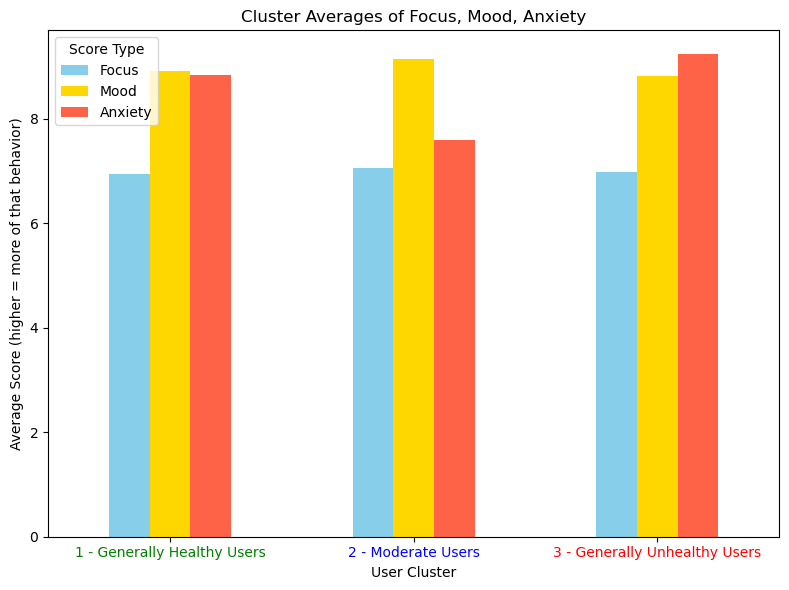

In [330]:
# # 4 CLUSTERS TESTING
# # Set the y-axis labels
# avg_scores_renamed = avg_scores.rename(columns=
# {
#     'focus_score': 'Focus',
#     'mood_score': 'Mood',
#     'anxiety_level': 'Anxiety'
# })
# 
# # Set up the plot itself
# ax = avg_scores_renamed.plot(kind = 'bar', figsize = (8, 6))
# 
# # Set the x-ticks, labels, and label colors 
# xtick_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
# colors = ['green', 'blue', 'orange', 'red']
# 
# ax.set_xticks(range(len(xtick_labels)))  # positions 0 1 and 2 
# ax.set_xticklabels(xtick_labels, rotation = 0)
# 
# for tick_label, color in zip(ax.get_xticklabels(), colors):
#     tick_label.set_color(color)
# 
# # Display the plot
# plt.title('Cluster Profiles – Focus, Mood, Anxiety')
# plt.ylabel('Average Score')
# plt.xlabel('User Cluster')
# plt.legend(title = 'Score Type')
# plt.tight_layout()
# plt.show()

# Set the y-axis labels
avg_scores_renamed = avg_scores.rename(columns=
{
    'focus_score': 'Focus',
    'mood_score': 'Mood',
    'anxiety_level': 'Anxiety'
})
bar_colors = ['skyblue', 'gold', 'tomato']

# Set up the plot itself
ax = avg_scores_renamed.plot(kind='bar', figsize=(8, 6), color=bar_colors)

# Set the x-ticks, labels, and label colors 
xtick_labels = ['1 - Generally Healthy Users', '2 - Moderate Users', '3 - Generally Unhealthy Users']
colors = ['green', 'blue', 'red']

ax.set_xticks(range(len(xtick_labels)))  # positions 0 1 and 2 in the histogram
ax.set_xticklabels(xtick_labels, rotation = 0)

for tick_label, color in zip(ax.get_xticklabels(), colors):
    tick_label.set_color(color)

# Display the plot
plt.title('Cluster Averages of Focus, Mood, Anxiety')
plt.ylabel('Average Score (higher = more of that behavior)')
plt.xlabel('User Cluster')
plt.legend(title = 'Score Type')
plt.tight_layout()
plt.show()